In [1]:
import pandas as pd

In [3]:
#load the data set
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
#encode the labels(positive=1, negative=0)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
#vecorize the text data
vectorizer = TfidfVectorizer(max_features=50000)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#split the dataset into training  and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#train and predict
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12483
           1       0.88      0.91      0.89     12517

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

[[10963  1520]
 [ 1170 11347]]


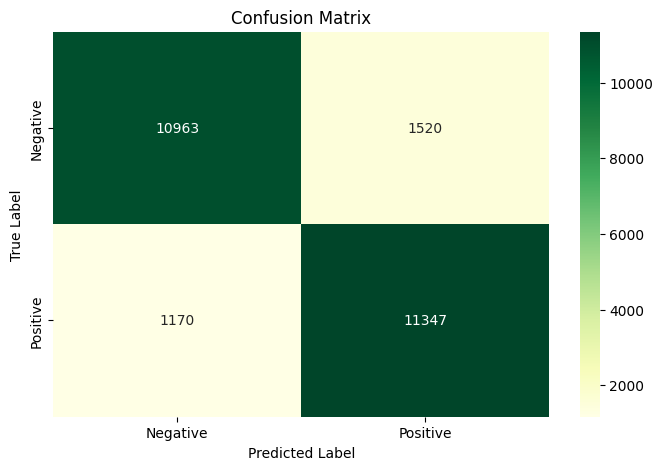

In [42]:
#evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#visualization
cm = confusion_matrix(y_test, y_pred)
conf_metrix = pd.DataFrame(data=cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_metrix, annot=True, fmt="d", cmap="YlGn")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
positive_reviews = sum(y_pred)
negative_reviews = len(y_pred) - positive_reviews

In [22]:
print(f"No. of positive Reviews: {positive_reviews}")
print(f"No. of negative Reviews: {negative_reviews}")

No. of positive Reviews: 12867
No. of negative Reviews: 12133
